In [1]:
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"
# Import netket library
import netket as nk
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Define Hamiltonian
$H=\sum_{i=1}^L \vec{\sigma}_i \cdot \vec{\sigma}_{i+1}$

In [2]:
L = 4
# 1-d hypercube with periodic boundary 
g = nk.graph.Hypercube(length=L, n_dim=1, pbc=True)

# Define the Hilbert space: spin half, total magnetization 0, same size as g)
hi = nk.hilbert.Spin(s=1/2, total_sz=0, N=g.n_nodes)

# Get Heisenberg Hamiltonian
# There is a factor of 2 between Pauli-matrices and spin-1/2 operators (thus a factor of 4 in H)
ha = nk.operator.Heisenberg(hilbert=hi, graph=g, J=0.25)

Traditional computation

In [3]:
# # Exact diagonalization
# evals = nk.exact.full_ed(ha)
# exact_gs_energy = evals[0]
# first_excited_state_energy = evals[1]
# print('The exact ground-state energy is E0=', exact_gs_energy)
# print('The exact first excited state energy is E1=', first_excited_state_energy)

In [3]:
# lanczos algorithm
evals = nk.exact.lanczos_ed(ha, k=2) # we need to calculate 2 eigenvalues
lanczos_gs_energy = evals[0]
lanczos_first_excited_energy = evals[1]
energy_per_site = lanczos_gs_energy / L
print('The lanczos ground-state energy is E0=', lanczos_gs_energy)
print('The lanczos first excited state energy is E1=', lanczos_first_excited_energy)
print('The lanczos ground-state energy per site is E0=', energy_per_site)

The lanczos ground-state energy is E0= -2.0
The lanczos first excited state energy is E1= -1.0000000000000002
The lanczos ground-state energy per site is E0= -0.5


Energy gap close plot

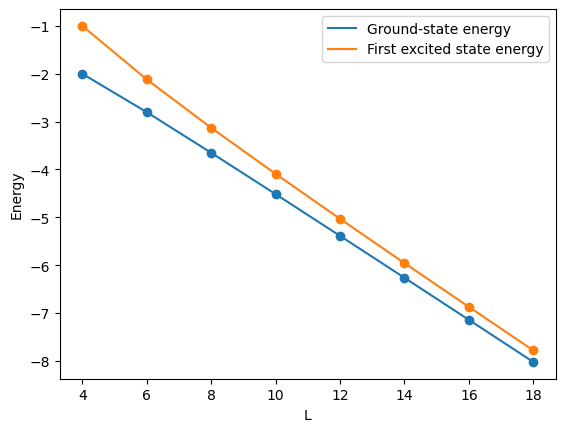

In [5]:
# Define a function to compute the ground-state and first excited state energies vs L
def compute_energies(L):
    g = nk.graph.Hypercube(length=L, n_dim=1, pbc=True)
    hi = nk.hilbert.Spin(s=0.5, total_sz=0, N=g.n_nodes)
    ha = nk.operator.Heisenberg(hilbert=hi, graph=g, J=0.25)
    evals = nk.exact.lanczos_ed(ha, k=2)
    return evals[0], evals[1]

L_values = list(range(4, 20, 2))
gs_energies = []
first_excited_energies = []

for L in L_values:
    gs_energy, first_excited_energy = compute_energies(L)
    gs_energies.append(gs_energy)
    first_excited_energies.append(first_excited_energy)

plt.plot(L_values, gs_energies, label='Ground-state energy')
plt.scatter(L_values, gs_energies)  # Add data points for ground-state energy

plt.plot(L_values, first_excited_energies, label='First excited state energy')
plt.scatter(L_values, first_excited_energies)  # Add data points for first excited state energy

plt.xlabel('L')
plt.ylabel('Energy')
plt.legend()
plt.show()

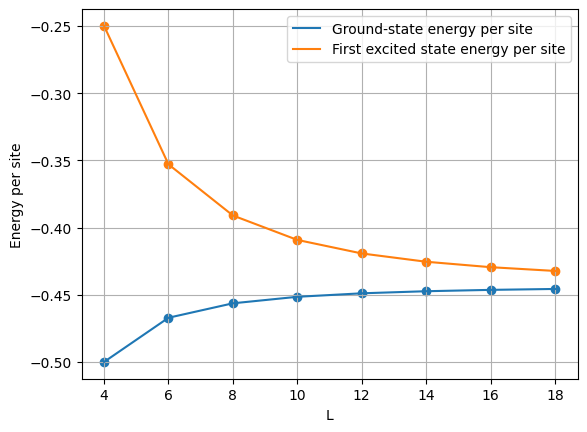

In [6]:
# energy per site
gs_energies = np.array(gs_energies)
excited_energies = np.array(first_excited_energies)

# Plot the results
plt.plot(L_values, gs_energies / L_values, label='Ground-state energy per site')
plt.scatter(L_values, gs_energies / L_values)  # Add data points for ground-state energy per site

plt.plot(L_values, excited_energies / L_values, label='First excited state energy per site')
plt.scatter(L_values, excited_energies / L_values)  # Add data points for first excited state energy per site

plt.xlabel('L')
plt.ylabel('Energy per site')
plt.legend()
plt.grid(True)
plt.show()

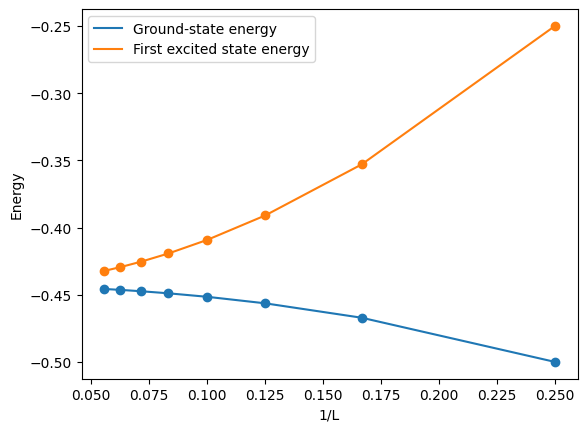

In [ ]:
# plot 1/L
inverse_L_values = [1/L for L in L_values]

plt.plot(inverse_L_values, gs_energies/L_values, label='Ground-state energy')
plt.scatter(inverse_L_values, gs_energies/L_values)  # Add data points for ground-state energy
plt.plot(inverse_L_values, excited_energies/L_values, label='First excited state energy')
plt.scatter(inverse_L_values, excited_energies/L_values)  

# Add data points for first excited state energy
plt.xlabel('1/L')
plt.ylabel('Energy')
plt.legend()
plt.show()